# Data Analysis of Iris Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I followed the instructions on page https://archive.ics.uci.edu/dataset/53/iris

In [3]:
pip install ucimlrepo

In [5]:
#downloading 
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [6]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


I have 2 variables. Dataframe X with morphological values and dataseries y with species of iris. I going to merge them.

In [8]:
df=pd.merge_asof(X,y, left_index=True, right_index=True)

In [9]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

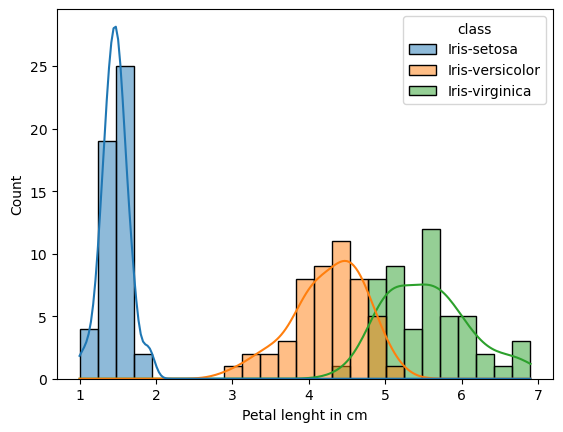

In [18]:
plot=sns.histplot(df, x=df['petal length'], hue=df['class'], kde=True, bins=25)
plt.xlabel('Petal lenght in cm')
plt.savefig("petal_lenght_hist.png")

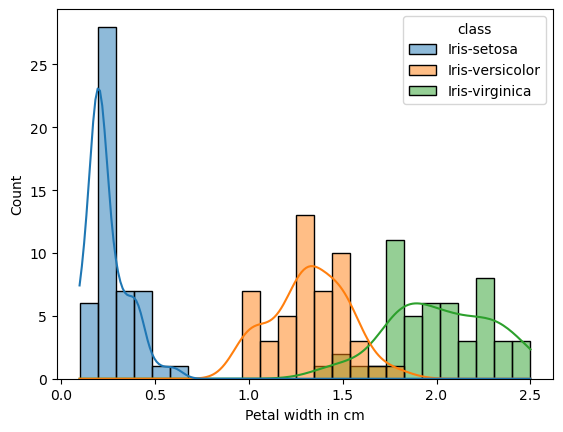

In [19]:
sns.histplot(df, x=df['petal width'], hue=df['class'], kde=True, bins=25)
plt.xlabel('Petal width in cm')
plt.savefig('petal_width_hist.png')

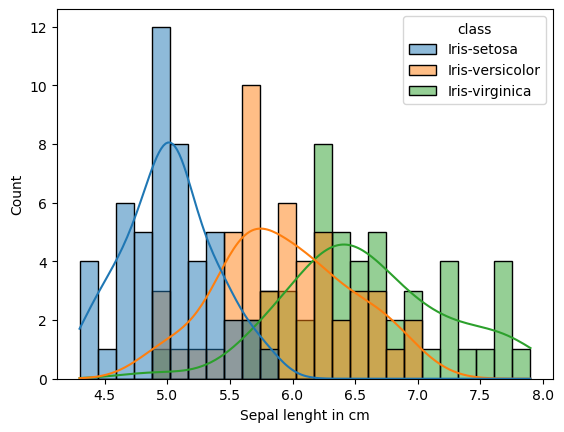

In [20]:
sns.histplot(df, x=df['sepal length'], hue=df['class'], kde=True, bins=25)
plt.xlabel('Sepal lenght in cm')
plt.savefig('sepal_lenght_hist.png')

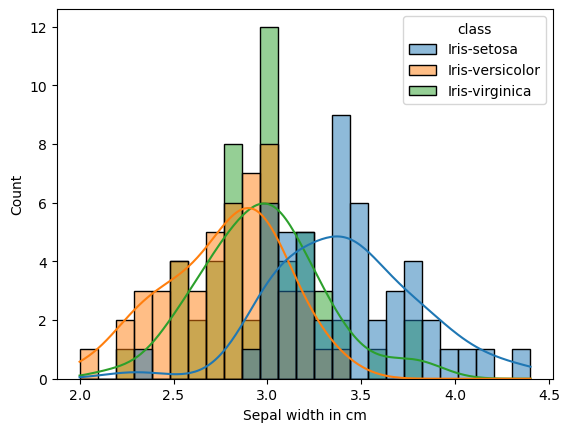

In [21]:
sns.histplot(df, x=df['sepal width'], hue=df['class'], kde=True, bins=25)
plt.xlabel('Sepal width in cm')
plt.savefig('sepal_width_hist.png')

In [46]:
df.cov(numeric_only=True)

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [48]:
corr_coef=df.corr(numeric_only=True)

<Axes: >

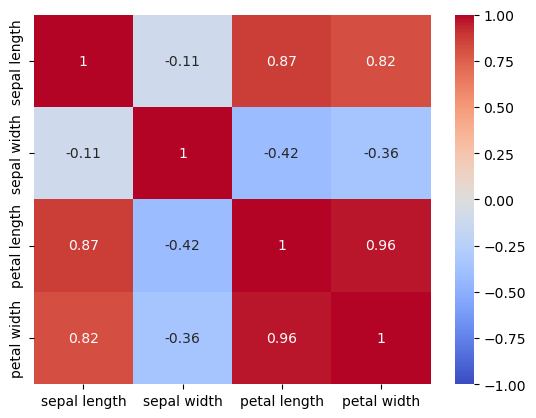

In [49]:
sns.heatmap(corr_coef, annot=True, cmap='coolwarm', vmin=-1,vmax=1)


***
### End